# Download the data 

In [9]:
# Download only once
!mkdir data
!wget https://storage.data.gov.sg/resale-flat-prices/resale-flat-prices.zip --directory-prefix=data/
!unzip data/resale-flat-prices.zip -d data/

mkdir: cannot create directory ‘data’: File exists
--2019-05-29 21:42:41--  https://storage.data.gov.sg/resale-flat-prices/resale-flat-prices.zip
Resolving storage.data.gov.sg (storage.data.gov.sg)... 104.20.11.58, 104.20.10.58, 2606:4700:10::6814:b3a, ...
Connecting to storage.data.gov.sg (storage.data.gov.sg)|104.20.11.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63951492 (61M) [application/zip]
Saving to: ‘data/resale-flat-prices.zip.4’

resale-flat-prices. 100%[===================>]  60.99M  17.1MB/s    in 3.5s    

2019-05-29 21:42:45 (17.4 MB/s) - ‘data/resale-flat-prices.zip.4’ saved [63951492/63951492]

Archive:  data/resale-flat-prices.zip
 extracting: data/metadata-resale-flat-prices.txt  
 extracting: data/resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv  
 extracting: data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv  
 extracting: data/resale-flat-prices-based-on-approval-date-2000-feb-20

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
path = "data/"

In [12]:
df_train = pd.read_csv(path+'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

In [13]:
df_train['storey_range'].unique()

array(['06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25',
       '26 TO 30', '36 TO 40', '31 TO 35', '04 TO 06', '01 TO 03',
       '07 TO 09', '10 TO 12', '13 TO 15', '19 TO 21', '22 TO 24',
       '16 TO 18', '25 TO 27', '28 TO 30', '37 TO 39', '34 TO 36',
       '31 TO 33', '40 TO 42'], dtype=object)

In [14]:
df_train['flat_model'].unique()

array(['Improved', 'New Generation', 'Standard', 'Model A', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Model A-Maisonette',
       'Apartment', 'Adjoined flat', 'Multi Generation', 'Model A2',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', 'DBSS',
       'Type S1'], dtype=object)

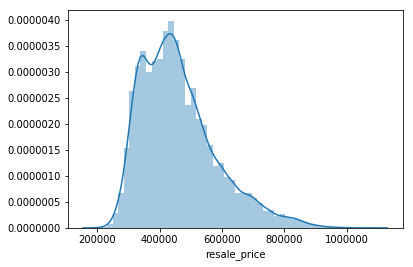

In [15]:
#histogram
sns.distplot(df_train['resale_price']);

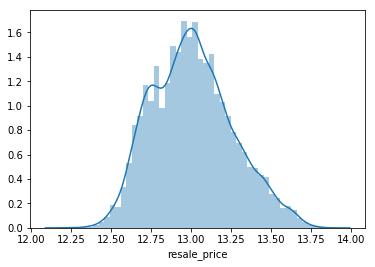

In [16]:
sns.distplot(np.log(df_train['resale_price']))

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df_train['resale_price'].skew())
print("Kurtosis: %f" % df_train['resale_price'].kurt())

Skewness: 0.949056
Kurtosis: 0.852112


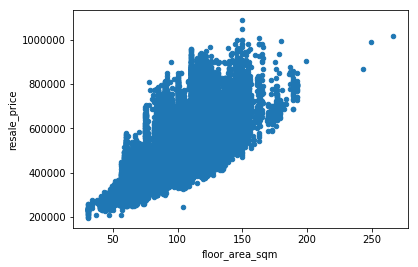

In [18]:
#scatter plot grlivarea/saleprice
var = 'floor_area_sqm'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price');

In [19]:
df_train['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [20]:
df_train['room_number'] = df_train['flat_type'].map({
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 3,
    'MULTI-GENERATION': 4,
    '1 ROOM': 1
})

In [21]:
df_train['toilet_number'] = df_train['flat_type'].map({
    '1 ROOM': 1,
    '2 ROOM': 1,
    '3 ROOM': 2,
    '4 ROOM': 2,
    '5 ROOM': 2,
    'EXECUTIVE': 2,
    'MULTI-GENERATION': 3
}) 

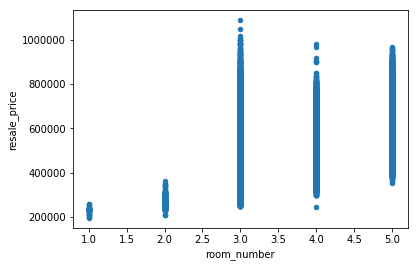

In [22]:
#scatter plot grlivarea/saleprice
var = 'room_number'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price');

In [23]:
df_train['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

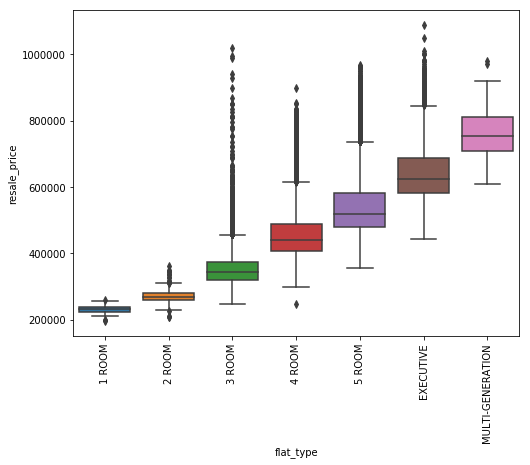

In [13]:
#box plot overallqual/saleprice
var = 'flat_type'
df_train = df_train.sort_values(var)
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="resale_price", data=data)

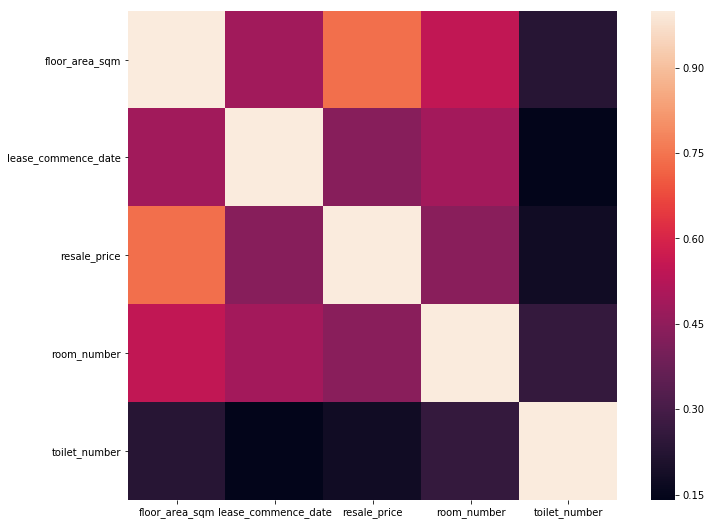

In [14]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True);

#  Feature Creation

In [15]:
north_east = "NORTH_EAST"
east = "EAST"
west = "WEST"
north = "NORTH"
central = "CENTRAL"
unknow = "UNKNOWN"

town_to_geographical_region  = {
    "ANG MO KIO" : north_east,
    "BEDOK" : east,
    "BISHAN" : central,
    "BUKIT BATOK" : west,
    "BUKIT MERAH" : central,
    "BUKIT PANJANG" : west,
    "BUKIT TIMAH" : central,
    "CENTRAL AREA" : central,
    "CHOA CHU KANG" : west,
    "CLEMENTI" : west,
    "GEYLANG" : central,
    "HOUGANG" : north_east,
    "JURONG EAST" : west,
    "JURONG WEST" : west,
    "KALLANG/WHAMPOA" : central,
    "MARINE PARADE" : central,
    "PASIR RIS" : east,
    "PUNGGOL" : north_east,
    "QUEENSTOWN" : west,
    "SEMBAWANG" : north,
    "SENGKANG" : north_east,
    "SERANGOON" : north_east,
    "TAMPINES" : east,
    "TOA PAYOH" : central,
    "WOODLANDS" : north,
    "YISHUN" : north
}

In [16]:
df_train['direction'] = df_train['town'].apply(lambda x : town_to_geographical_region[x])

In [155]:
df_train['storey_low'] = df_train['storey_range'].apply(lambda x: x.split(" ")[0]).astype('int')
df_train['storey_high'] = df_train['storey_range'].apply(lambda x: x.split(" ")[2]).astype('int')
from random import seed
from random import randint

seed(42)
storey_low = [o for o in df_train['storey_low']]
storey_high = [o for o in df_train['storey_high']]
storey_random = [randint(low,high) for low, high in zip(storey_low,storey_high)]
df_train['storey_random'] = storey_random

df_train.drop('storey_range',axis=1,inplace=True)
df_train.drop('storey_low',axis=1,inplace=True)
df_train.drop('storey_high',axis=1,inplace=True)

In [158]:
df_train['sale_year'] = df_train['month'].apply(lambda x: x.split("-")[0]).astype('int')
df_train['sale_month'] = df_train['month'].apply(lambda x: x.split("-")[1]).astype('int')

## Delete feature that is not helpful

In [159]:
df_train = df_train.drop(['block'],axis=1)
df_train = df_train.drop(['month'],axis=1)

In [160]:
len(df_train)

52203

## Correct feature skewness

In [161]:
from scipy.special import boxcox1p
from scipy.stats import norm, skew #for some statistics

In [162]:
numeric_feats = df_train.select_dtypes(include=['number']).columns
skew_feats = df_train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_feats.head(10)

storey_random          1.229324
resale_price           0.949029
floor_area_sqm         0.304876
room_number            0.142279
sale_year              0.140357
lease_commence_date   -0.004558
sale_month            -0.013106
toilet_number         -8.251348
dtype: float64

In [163]:
df_train['storey_random'] = boxcox1p(df_train['storey_random'],0.15)

## Train test split

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_all = df_train.drop('resale_price',axis=1)
y_all = np.log(df_train['resale_price'])

In [ ]:
x_all = pd.get_dummies(x_all)

In [ ]:
dum_x_train,_,_,_ = train_test_split(df_train,y_all,stratify=df_train['town'],random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,stratify=df_train['town'],random_state=42)

In [168]:
# Get smaller sample size to perform experiment

x_train, _ , y_train, _ = train_test_split(x_train,y_train,test_size=0.95,
                                           random_state=42,stratify=dum_x_train['town'])

# Modeling

In [170]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import mlflow
import mlflow.sklearn

In [171]:
class SklearnModelWithName:
    def __init__(self,model_name,model_definition):
        self.model_name = model_name
        self.model_definition = model_definition

In [172]:
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def log_result(model_name,model_score,print_result=True):
    if print_result:
        print("{:s}: {:.4f} ({:.4f})\n".format(model_name,model_score.mean(), model_score.std()))
    model_score_mean_name = f"{model_name}_loss_score"
    model_score_std_name = f"{model_name}_std"
    mlflow.log_metric(model_score_mean_name,model_score.mean())
#     mlflow.log_metric(model_score_std_name,model_score.std())

def run_experiment(models,descriptions):
    mlflow.start_run(run_name="HDB Price Prediction")
    for i,o in enumerate(descriptions):
        mlflow.log_param(f"Description {i}",o)
    mlflow.log_param("Train data size", len(x_train))
    for model in models:
        score = rmsle_cv(model.model_definition)
        log_result(model.model_name,score)
    mlflow.end_run()

In [173]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(alpha =0.00001, random_state=1))
elasticnet = SklearnModelWithName("elasticnet",elasticnet)

In [174]:
svm = make_pipeline(RobustScaler(),SVR(C=140))
svm  = SklearnModelWithName("svm",svm)

In [175]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = SklearnModelWithName("lasso",lasso)

In [176]:
GBoost = GradientBoostingRegressor(loss='huber',min_samples_split=10,n_estimators=200)
GBoost = SklearnModelWithName("gboost",GBoost)

In [177]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb = SklearnModelWithName("model_xgb",model_xgb)

In [178]:
extra_tree = ExtraTreesRegressor(n_estimators=100,n_jobs=4,min_samples_split=10)
extra_tree = SklearnModelWithName("extra_tree",extra_tree)

In [179]:
random_forest = RandomForestRegressor(n_estimators=100,n_jobs=4,min_samples_split=10)
random_forest = SklearnModelWithName("random_forest",random_forest)

In [180]:
krr = KernelRidge(alpha=1e-5,kernel='polynomial',degree=3)
krr = SklearnModelWithName("krr",krr)

## Stacking Classifier

In [184]:
class StackClassifer(BaseEstimator, TransformerMixin, RegressorMixin):
    def __init__(self,base_models,meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit_model(self,_model,_x,_y):
        _model.fit(_x,_y)
        return _model
        
    def fit(self,X,y):
        self.base_models_ = clone(self.base_models)
        self.meta_model_ = clone(self.meta_model)
        for base_model in self.base_models_:
            base_model.fit(X,y)
        y_pred = np.array([base_model.predict(X) for base_model in self.base_models_])
        meta_train = y_pred.mean(axis=0,keepdims=True).T
        self.meta_model_.fit(meta_train,y)
        return self
    
    def predict(self,X):
        y_pred = np.array([base_model.predict(X) for base_model in self.base_models_])
        meta_train = y_pred.mean(axis=0,keepdims=True).T
        return self.meta_model_.predict(meta_train)

In [ ]:
experiment_description = [
    'Combination of every thing'
]
base_models_w_name = [elasticnet,svm,extra_tree,model_xgb]
meta_model_w_name = lasso
base_models = [o.model_definition for o in base_models_w_name]
meta_model = meta_model_w_name.model_definition
stack_clf = StackClassifer(base_models,meta_model)
stack_clf = SklearnModelWithName("stack_clf",stack_clf)
run_experiment([elasticnet,svm,lasso,
                GBoost,model_xgb,extra_tree,random_forest],experiment_description)

# Prediction

In [ ]:
# Easy way to apply dummies for new data
# https://stackoverflow.com/questions/28465633/easy-way-to-apply-transformation-from-pandas-get-dummies-to-new-data

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
base_models_w_name = [elasticnet,svm,extra_tree,model_xgb]
meta_model_w_name = lasso
base_models = [o.model_definition for o in base_models_w_name]
meta_model = meta_model_w_name.model_definition

stack_clf = StackClassifer(base_models,meta_model)
stack_clf.fit(x_train,y_train)

In [ ]:
y_pred = stack_clf.predict(x_test)

In [ ]:
rmsle(y_test,y_pred)